In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [73]:
# Call in the csv file
file = './us_pollution_data_cleaned.csv'
df = pd.read_csv(file)
# Remove Country of Mexico data from the DataFrame
df = df.loc[df['State'] != 'Country Of Mexico']
display(df.head(), df.tail())

,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Year
0,Arizona,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,1.145833,4.2,2000
1,Arizona,2000-01-01,19.041667,49.0,0.022500,0.040,3.000000,9.0,0.878947,2.2,2000
2,Arizona,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,1.145833,4.2,2000
3,Arizona,2000-01-01,19.041667,49.0,0.022500,0.040,2.975000,6.6,0.878947,2.2,2000
4,Arizona,2000-01-02,22.958333,36.0,0.013375,0.032,1.958333,3.0,0.850000,1.6,2000


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,Year
1722052,Wyoming,2015-12-30,7.047826,18.8,0.036917,0.043,-0.057143,0.2,0.154167,0.200,2015
1722053,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.187500,-0.1,0.103458,0.155,2015
1722054,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.187500,-0.1,0.100000,0.100,2015
1722055,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.175000,-0.1,0.103458,0.155,2015
1722056,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.175000,-0.1,0.100000,0.100,2015


In [74]:
# Make a new dataframe focused only on NO2 data
col = ['State', 'Date Local', 'NO2 Mean', 'NO2 1st Max Value', 'Year']
no2_df = df[col]
no2_df.head(15)

,State,Date Local,NO2 Mean,NO2 1st Max Value,Year
0,Arizona,2000-01-01,19.041667,49.0,2000
1,Arizona,2000-01-01,19.041667,49.0,2000
2,Arizona,2000-01-01,19.041667,49.0,2000
3,Arizona,2000-01-01,19.041667,49.0,2000
4,Arizona,2000-01-02,22.958333,36.0,2000
5,Arizona,2000-01-02,22.958333,36.0,2000
6,Arizona,2000-01-02,22.958333,36.0,2000
7,Arizona,2000-01-02,22.958333,36.0,2000
8,Arizona,2000-01-03,38.125000,51.0,2000
9,Arizona,2000-01-03,38.125000,51.0,2000


In [75]:
# Group data by years
group = no2_df.groupby('Year')
mean = group.mean()
mean

,NO2 Mean,NO2 1st Max Value
Year,,
2000,17.433768,32.844986
2001,17.601948,33.072649
2002,16.385855,31.014175
2003,15.864934,29.947360
2004,14.975201,28.494426
2005,15.010923,29.000439
2006,14.301458,28.080610
2007,13.180723,26.227249
2008,12.136647,24.640275


In [76]:
# Use .arange to make x values for the following charts/graphs
x_values = np.arange(2000, 2016, 1)
x_values

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [77]:
y_values = group['NO2 1st Max Value'].mean()
y_values_mean = group['NO2 Mean'].mean()

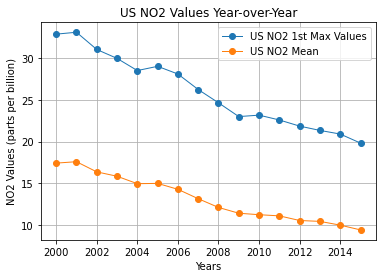

In [55]:
# Line graph for US NO2 1st Max Values and NO2 Mean Values
plt.plot(x_values, y_values, marker = 'o', linewidth = 1, label = 'US NO2 1st Max Values')
plt.plot(x_values, y_values_mean, marker = 'o', linewidth = 1, label = 'US NO2 Mean')
plt.title('US NO2 Values Year-over-Year')
plt.grid()
plt.xlabel('Years')
plt.ylabel('NO2 Values (parts per billion)')
plt.legend(loc = 'best')
plt.tight_layout
plt.savefig('./us_no2_plot.png')
plt.show()

The r-squared is: -0.986104007141582


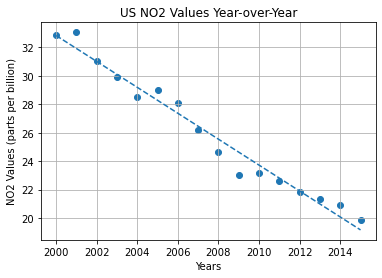

In [84]:
# Linear regression analysis for US NO2 1st Max Values
plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "--")
# plt.annotate(line_eq,(2006, 30),fontsize=15,color="red")

plt.title('US NO2 Values Year-over-Year')
plt.grid()
plt.xlabel('Years')
plt.ylabel('NO2 Values (parts per billion)')
print(f"The r-squared is: {rvalue}")
plt.savefig('./us_no2_plot_linregress.png')
plt.show()

In [45]:
# Group data by states to see which states are the most and least polluted
state_group = no2_df.groupby('State')
state_group.mean().sort_values(by = 'NO2 1st Max Value')

,NO2 Mean,NO2 1st Max Value,Year
State,,,
Tennessee,1.736740,4.113261,2007.848188
South Carolina,1.806195,4.807477,2007.504050
Hawaii,3.164697,9.264549,2012.924245
Wyoming,3.289170,10.549180,2011.793663
Maine,5.101545,12.068127,2010.945642
South Dakota,5.073974,12.110269,2012.950216
North Dakota,4.798146,13.307941,2011.370377
Rhode Island,7.097373,15.509178,2013.382877
Iowa,6.834806,15.645388,2012.092564


In [46]:
# Generates x and y values for the state of Arizona
arizona_df = df.loc[df['State'] == 'Arizona']
group_arizona = arizona_df.groupby('Year')
group_arizona.count()

arizona_y_values = group_arizona['NO2 1st Max Value'].mean()
# arizona_y_values_mean = group_arizona['NO2 Mean'].mean()

In [50]:
# Generates x and y values for Tennessee
tn_df = df.loc[df['State'] == 'Tennessee']
group_tn = tn_df.groupby('Year')
group_tn.count()

# Note that there is data for only 6 years, so y values must be defined manually
tn_y_values = group_tn['NO2 1st Max Value'].mean()
tn_y_values
tn_x_values = [2002, 2003, 2008, 2009, 2010, 2015]

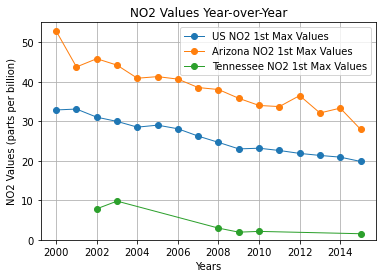

In [56]:
# Plot of 1st Max Values for US, Arizona, and Tennessee
# Arizona is chosen because it is the most polluted state, and Tennessee is chosen because it is the least
plt.plot(x_values, y_values, marker = 'o', linewidth = 1, label = 'US NO2 1st Max Values')
plt.plot(x_values, arizona_y_values, marker = 'o', linewidth = 1, label = 'Arizona NO2 1st Max Values')
plt.plot(tn_x_values, tn_y_values, marker = 'o', linewidth = 1, label = 'Tennessee NO2 1st Max Values')
plt.title('NO2 Values Year-over-Year')
plt.grid()
plt.xlabel('Years')
plt.ylabel('NO2 Values (parts per billion)')
plt.ylim(0, 55)
plt.legend(loc = 'best')
plt.tight_layout
plt.savefig('./us_az_tn_no2_plot.png')
plt.show()